In [1]:
%run dcgan.ipynb
%run code.ipynb

import ipynb.fs.full.code as code
import ipynb.fs.full.dcgan as dcgan
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
enum = ['all', 'bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']

In [3]:
def dict_fakemons(path):

    p, d, fs = next(os.walk(path))
    gen_fakemons = {}
    
    for file in fs:
        random_type = file.split('_')
        random_type = random_type[0]
        model = dcgan.load_gen(path, file)
        gen_fakemons[random_type] = model
        
    return gen_fakemons

In [4]:
def RunAll():

    path = 'data/'
    gen_fakemons = dict_fakemons('models/Generator/')
    epochs = 500

    while(len(gen_fakemons) < len(enum)):

        # choice of the type to do
        random_type = code.rand_type(enum)
        print("random type: " + random_type)

        while (code.check_if_done(random_type)):
            print("already done, choosing a new one")
            random_type = code.rand_type(enum)
            print("New type ? - " + random_type)

        print("Type(s) chosen for creating new Pokemon : " + random_type)

        # preparing the gan
        trainloader = code.create_trainloader(path, random_type)
        generator, discriminator = code.create_gen_dis()

        print("preparing done")

        # doing the gan
        res_gen, res_dis, images = code.ml(trainloader, generator, discriminator, epochs)

        print("ml done")

        code.save_models(res_gen, res_dis, random_type, epochs)
        print("saving done")

        gen_fakemons[random_type] = res_gen
        print("adding gen to dict done\n\n")

    dcgan.delete_directory('to_delete')

    return gen_fakemons

In [ ]:
gen_fakemons = RunAll()

In [6]:
gen_fakemons = dict_fakemons('models/Generator/')
gen_fakemons.keys()

dict_keys(['bug', 'electric', 'fairy', 'ghost', 'rock', 'water'])

In [ ]:
# todo : 1000 epochs for bug, fairy, ghost

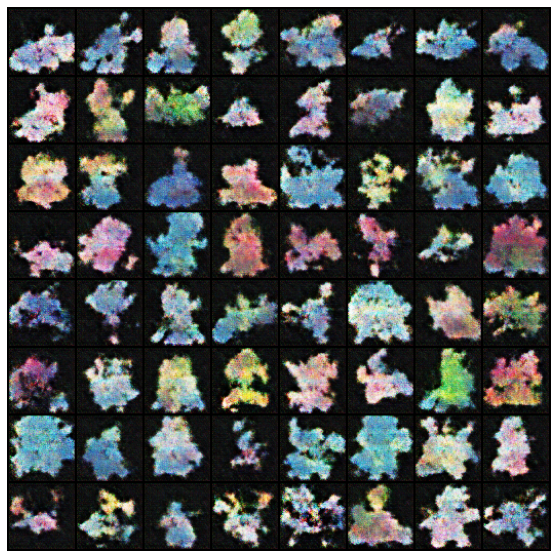

In [14]:
import matplotlib.pyplot as plt
import numpy as np

images = code.get_fakemons(gen_fakemons['water'])
fig = plt.figure(figsize = (10, 10))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i, (1,2,0)), animated = True)] for i in images[::5]]